In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [2]:
data, info = tfds.load(name='fashion_mnist', as_supervised=True, split=None, with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [3]:
train, test = data['train'], data['test']

In [4]:
BUFFER_SIZE = 10 # Use a much larger value for real code.
BATCH_SIZE = 64
NUM_EPOCHS = 5

def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    
    return image, label

train_data = train.map(normalize).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_data = test.map(normalize).batch(BATCH_SIZE)

STEPS_PER_EPOCH = 5

train_data = train_data.take(STEPS_PER_EPOCH)
test_data = test_data.take(STEPS_PER_EPOCH)

In [5]:
image_batch, label_batch = next(iter(train_data))

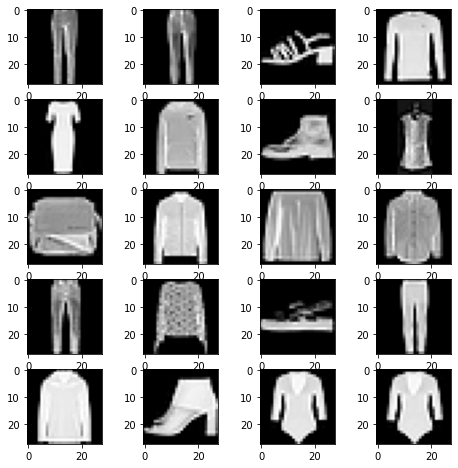

In [6]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.random.randint(0, BATCH_SIZE, size=30)
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_batch[idx[i],:,:,0], cmap='gray')
plt.show()

In [7]:
model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(32, 3, activation='relu', 
                                                   kernel_regularizer=tf.keras.regularizers.l2(0.02), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dropout(0.1),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dense(10, activation='softmax')
                            ])

In [8]:
# Model is the full model w/o custom layers
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_data, epochs = NUM_EPOCHS)
loss, acc = model.evaluate(test_data)
print("Loss {}, Accuracy {}".format(loss, acc))

Epoch 1/5
5/5 [==============================] - 0s 6ms/step - loss: 1.7255 - accuracy: 0.4531
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 0.9338 - accuracy: 0.7094
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 0.7342 - accuracy: 0.7937
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.8375
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 1.6220 - accuracy: 0.7000
Loss 1.6220324039459229, Accuracy 0.699999988079071
